<a href="https://colab.research.google.com/github/Siera-Collab/TaskWeek2/blob/main/TaskWeek4_Siera_Barokatillah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   Nama : Siera Barokatillah
*   NPM   : 2006568714


In [2]:
!pip install d2l


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 4.0 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 101.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 97.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 109.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.7/124.7 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 8.4 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    U

# Deep Convolutional Neural Networks (AlexNet)

In [4]:
import torch
from torch import nn
from d2l import torch as d2l

# AlexNet

In [5]:
class AlexNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(96, kernel_size=11, stride=4, padding=1),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(256, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(256, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),
            nn.LazyLinear(4096), nn.ReLU(),nn.Dropout(p=0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

In [6]:
AlexNet().layer_summary((1, 1, 224, 224))

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

# Training

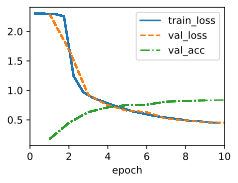

In [7]:
model = AlexNet(lr=0.01)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)

# **EXERCISES 8.1**

1. Analisis sifat komputasi dari AlexNet.

*   Memori yang dibutuhkan untuk lapisan konvolusi bergantung pada ukuran filter (kernel), jumlah filter, ukuran input, dan jumlah saluran (channels). Memori juga digunakan untuk menyimpan hasil convolusi (output feature maps).
*   Lapisan Fully Connected (FC): Lapisan fully connected memiliki jumlah parameter yang sangat besar, karena setiap neuron dihubungkan ke setiap neuron di lapisan sebelumnya. Dalam AlexNet, ini menyebabkan FC lapisan menggunakan lebih banyak memori dibandingkan lapisan konvolusi.

*   Dominasi: Biasanya, pada arsitektur besar seperti AlexNet, lapisan fully connected memiliki jejak memori yang lebih besar dibandingkan dengan lapisan konvolusi, terutama karena ukuran parameter di FC jauh lebih banyak.

2.   Biaya Komputasi
*   Biaya komputasi lapisan konvolusi bergantung pada ukuran filter, stride, padding, jumlah filter, dan ukuran input. Secara komputasi, convolusi melibatkan pengalian matriks besar, tetapi ini bisa dioptimalkan.


3.   Pengaruh Memori pada Komputasi
*   Latensi tinggi atau bandwidth rendah memori akan memperlambat proses baca dan tulis data, yang akan memperlambat komputasi keseluruhan, terutama jika sistem memori tidak dapat mengikuti kecepatan perhitungan GPU atau CPU.

*   Perbedaan dalam Pelatihan vs Inferensi:
 Selama pelatihan, memori dibutuhkan tidak hanya untuk menyimpan parameter dan output tetapi juga gradien selama backpropagation. Jadi, pelatihan lebih sensitif terhadap penggunaan memori. Inferensi biasanya membutuhkan lebih sedikit memori karena hanya membutuhkan forward pass tanpa menyimpan gradien, sehingga lebih ringan dari segi memori.

4.   Trade-off Desain Chip antara Komputasi dan Bandwidth Memori

*   Untuk mengoptimalkan desain chip, peningkatan **cache lokal** dapat dilakukan untuk mengurangi ketergantungan pada memori eksternal yang lebih lambat, sehingga mempercepat akses data. Selain itu, **parallelism** dapat ditingkatkan dengan menambah lebih banyak inti (cores), namun ini akan membutuhkan lebih banyak daya dan memperbesar area chip. **Bandwidth memori** juga dapat ditingkatkan dengan menambahkan lebih banyak pin, tetapi ini akan meningkatkan kompleksitas dan ukuran desain chip. Penggunaan **mixed precision** (seperti 16-bit floating point) juga bisa diterapkan untuk mengurangi kebutuhan bandwidth dan konsumsi daya, sekaligus mempertahankan performa komputasi yang efisien.

5.   Mengapa Insinyur Tidak Lagi Melaporkan Benchmark pada AlexNet
*   AlexNet sudah mulai dianggap ketinggalan zaman. Arsitektur yang lebih modern seperti ResNet, EfficientNet, dan Vision Transformers (ViT) memberikan hasil yang jauh lebih baik dalam hal akurasi dan efisiensi komputasi. AlexNet juga memiliki ukuran dan kompleksitas yang terlalu besar untuk digunakan sebagai baseline saat ini.

6.    Meningkatkan Jumlah Epoch pada AlexNet vs LeNet
*   AlexNet cenderung lebih kompleks dibandingkan LeNet, yang berarti AlexNet membutuhkan lebih banyak epoch untuk mencapai akurasi optimal pada dataset yang lebih besar. Namun, pada dataset kecil atau sederhana seperti Fashion-MNIST, AlexNet mungkin akan mengalami overfitting lebih cepat dibandingkan LeNet karena kapasitasnya yang lebih besar.

7.    AlexNet untuk Dataset Fashion-MNIST
*   AlexNet mungkin terlalu besar untuk dataset seperti Fashion-MNIST karena resolusi gambar yang rendah (28x28 piksel). Model yang lebih sederhana seperti LeNet lebih cocok untuk dataset ini.

8.     Penyederhanaan AlexNet
*   Untuk menyederhanakan AlexNet agar lebih efisien pada dataset kecil seperti Fashion-MNIST, Anda bisa mengurangi jumlah filter di setiap lapisan konvolusi, karena terlalu banyak filter akan menghasilkan kompleksitas yang tidak perlu. Selain itu, mengganti beberapa lapisan fully connected atau mengurangi dimensinya dapat mempercepat pelatihan tanpa mengorbankan akurasi secara signifikan. Penggunaan dropout yang lebih tinggi juga bisa membantu mencegah overfitting sambil mengurangi kompleksitas model, menjadikan proses pelatihan lebih cepat dengan jejak memori yang lebih kecil.

9.   Desain Model yang Lebih Baik

*   Untuk dataset gambar dengan resolusi rendah seperti Fashion-MNIST, model yang lebih baik bisa didesain dengan menggunakan lapisan konvolusi yang lebih sedikit dan lebih sederhana. Resolusi input juga dapat dikurangi, misalnya dari 224x224 ke 32x32, untuk menghindari kelebihan parameter yang tidak diperlukan. Jumlah neuron di lapisan fully connected juga dapat dikurangi. Model yang lebih ringan dengan arsitektur efisien akan mempercepat pelatihan tanpa terlalu banyak penurunan akurasi, membuatnya lebih cocok untuk dataset berukuran kecil dan sederhana.

10.   Pengaruh Ukuran Batch
*  Mengubah ukuran batch dapat memiliki dampak yang signifikan pada throughput, akurasi, dan penggunaan memori GPU. Ukuran batch yang lebih besar akan meningkatkan throughput (gambar yang diproses per detik), tetapi juga akan membutuhkan lebih banyak memori GPU, yang bisa menjadi kendala pada perangkat dengan keterbatasan memori. Sebaliknya, ukuran batch yang lebih kecil akan mengurangi penggunaan memori, tetapi throughput dapat menurun, dan model mungkin membutuhkan waktu lebih lama untuk dilatih. Menemukan ukuran batch yang optimal bergantung pada keseimbangan antara kinerja, penggunaan memori, dan kecepatan pelatihan.

11.   Dropout dan ReLU pada LeNet-5

*   Menerapkan dropout dan ReLU pada arsitektur LeNet-5 dapat secara signifikan meningkatkan performa model. Dropout membantu mengurangi overfitting dengan secara acak menonaktifkan neuron selama pelatihan, mencegah model dari terlalu menghafal data latih. Sementara itu, ReLU mempercepat proses konvergensi dengan mengatasi masalah vanishing gradient, sehingga pelatihan menjadi lebih efisien. Peningkatan lebih lanjut dapat dilakukan dengan prapemrosesan gambar, misalnya augmentasi data, untuk mengambil keuntungan dari invariansi dalam gambar dan membuat model lebih tahan terhadap variasi input.

12.   Membuat AlexNet Overfit
*  Untuk membuat AlexNet overfit, kita dapat menghapus atau mengurangi mekanisme regularisasi seperti dropout atau weight decay. kita juga bisa meningkatkan jumlah lapisan fully connected atau menambah jumlah neuron di setiap lapisan tanpa meningkatkan jumlah data, yang akan menyebabkan model lebih cenderung menghafal data latih. Pengurangan data augmentasi atau penggunaan batch size yang sangat kecil juga dapat memfasilitasi overfitting, karena model akan lebih fokus pada detail dari data pelatihan tanpa kemampuan generalisasi yang cukup kuat.















# 8.2 VGG BLOCKS

In [8]:
def vgg_block(num_convs, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.LazyConv2d(out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU())
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    return nn.Sequential(*layers)

# VGG NETWORK

In [9]:
class VGG(d2l.Classifier):
    def __init__(self, arch, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        conv_blks = []
        for (num_convs, out_channels) in arch:
            conv_blks.append(vgg_block(num_convs, out_channels))
        self.net = nn.Sequential(
            *conv_blks, nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

In [10]:
VGG(arch=((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))).layer_summary(
    (1, 1, 224, 224))

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


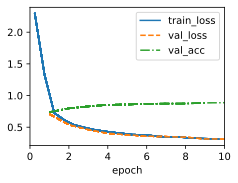

In [11]:
model = VGG(arch=((1, 16), (1, 32), (2, 64), (2, 128), (2, 128)), lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

# **EXERCISES 8.2**



1.   Dibandingkan dengan AlexNet, VGG jauh lebih lambat dalam hal komputasi, dan juga membutuhkan lebih banyak memori GPU.

VGG dirancang dengan lebih banyak lapisan dan filter yang lebih kecil (3x3), yang memperlambat komputasi dibandingkan dengan AlexNet yang menggunakan filter yang lebih besar dan lebih sedikit lapisan. Oleh karena itu, VGG memerlukan lebih banyak memori GPU untuk menyimpan bobot dan output dari setiap lapisan. AlexNet lebih efisien dalam hal kecepatan dan penggunaan memori, tetapi VGG menawarkan akurasi yang lebih tinggi karena strukturnya yang lebih dalam dan detail yang lebih baik dari lapisan konvolusi kecil.

AlexNet memiliki sekitar 60 juta parameter, sedangkan VGG-16 memiliki sekitar 138 juta parameter. Perbedaan besar ini sebagian besar disebabkan oleh jumlah lapisan yang jauh lebih banyak dalam VGG, serta ukuran fully connected layer yang besar. Meskipun VGG memberikan hasil yang lebih baik dalam banyak tugas, jumlah parameter yang besar ini membuatnya lebih sulit dilatih dan membutuhkan lebih banyak memori GPU dibandingkan AlexNet.

Untuk mengurangi biaya komputasi dari fully connected layer, salah satu pendekatannya adalah menggantinya dengan global average pooling, yang secara dramatis mengurangi jumlah parameter tanpa mengorbankan performa. Cara lain adalah dengan menggunakan dimensionality reduction atau mengurangi jumlah neuron pada setiap lapisan fully connected. Selain itu, penggunaan pruning untuk menghilangkan koneksi yang kurang penting juga bisa mengurangi biaya komputasi tanpa menurunkan akurasi.


2.   Ketika menampilkan dimensi yang terkait dengan berbagai lapisan jaringan, kita hanya melihat informasi yang terkait dengan delapan blok (plus beberapa transformasi tambahan), meskipun jaringan memiliki 11 lapisan. Ke mana tiga lapisan yang tersisa?

Tiga lapisan yang tidak terlihat tersebut merupakan lapisan aktivasi non-linear seperti ReLU yang tidak selalu ditampilkan saat menampilkan dimensi jaringan, karena mereka tidak mempengaruhi dimensi dari input atau output. ReLU berfungsi untuk memperkenalkan non-linearitas di antara lapisan konvolusi, tetapi tidak memerlukan perubahan dalam jumlah parameter atau dimensi dari output yang dihasilkan.

3.   Gunakan Tabel 1 dalam makalah VGG (Simonyan dan Zisserman, 2014) untuk membangun model umum lainnya, seperti VGG-16 atau VGG-19.

Makalah VGG memberikan arsitektur untuk beberapa model, termasuk VGG-16 dan VGG-19. Model VGG-16 terdiri dari 13 lapisan konvolusi dan 3 lapisan fully connected, sementara VGG-19 memiliki 16 lapisan konvolusi dan 3 lapisan fully connected. Perbedaan ini terlihat pada jumlah lapisan konvolusi di bagian awal jaringan. Model-model ini didesain dengan filter 3x3, padding 1, dan stride 1 di semua lapisan konvolusi, diikuti oleh pooling layers.


4. Upsampling resolusi dalam dataset Fashion-MNIST hingga delapan kali lipat (misalnya dari 28x28 ke 224x224) sangat boros. Cobalah mengubah arsitektur jaringan dan konversi resolusi, misalnya ke 56 atau 84 piksel sebagai input. Bisakah Anda melakukannya tanpa mengurangi akurasi jaringan? Konsultasikan makalah VGG untuk ide menambahkan lebih banyak non-linearitas sebelum downsampling.

Upsampling dari 28x28 ke 224x224 memang sangat tidak efisien karena menambah beban komputasi tanpa peningkatan signifikan dalam hasil. Anda bisa mencoba resolusi menengah seperti 56x56 atau 84x84 untuk menjaga keseimbangan antara resolusi gambar dan efisiensi komputasi. Menambahkan lebih banyak non-linearitas sebelum downsampling bisa membantu mempertahankan akurasi. Misalnya, menambahkan beberapa lapisan konvolusi kecil sebelum melakukan downsampling atau pooling bisa meningkatkan kemampuan model untuk menangkap fitur penting tanpa terlalu banyak meningkatkan biaya komputasi.




# 8.3. Network in Network (NiN)

In [12]:
def nin_block(out_channels, kernel_size, strides, padding):
    return nn.Sequential(
        nn.LazyConv2d(out_channels, kernel_size, strides, padding), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), nn.ReLU())

In [13]:
class NiN(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nin_block(96, kernel_size=11, strides=4, padding=0),
            nn.MaxPool2d(3, stride=2),
            nin_block(256, kernel_size=5, strides=1, padding=2),
            nn.MaxPool2d(3, stride=2),
            nin_block(384, kernel_size=3, strides=1, padding=1),
            nn.MaxPool2d(3, stride=2),
            nn.Dropout(0.5),
            nin_block(num_classes, kernel_size=3, strides=1, padding=1),
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten())
        self.net.apply(d2l.init_cnn)

In [14]:
NiN().layer_summary((1, 1, 224, 224))

Sequential output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Sequential output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Sequential output shape:	 torch.Size([1, 384, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 384, 5, 5])
Dropout output shape:	 torch.Size([1, 384, 5, 5])
Sequential output shape:	 torch.Size([1, 10, 5, 5])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 10, 1, 1])
Flatten output shape:	 torch.Size([1, 10])


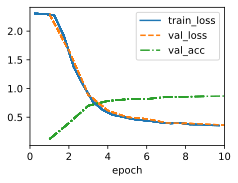

In [15]:
model = NiN(lr=0.05)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

# **EXERCISES 8.3**


**1. Mengapa ada dua lapisan konvolusi per blok NiN? Apa yang terjadi jika kita menambah jumlahnya menjadi tiga atau menguranginya menjadi satu? **
Pada NiN, setiap blok terdiri dari dua lapisan konvolusi diikuti oleh **1x1 convolutions**. Tujuan dari dua lapisan ini adalah untuk memperkaya ekstraksi fitur dengan lebih banyak representasi non-linearitas. Jika Anda menambah jumlah lapisan konvolusi menjadi tiga, model akan menjadi lebih dalam, sehingga menghasilkan **kapasitas representasi yang lebih besar**, tetapi juga meningkatkan jumlah parameter dan komputasi, yang mungkin meningkatkan akurasi namun dengan **biaya memori dan waktu komputasi** yang lebih tinggi. Sebaliknya, jika jumlah lapisan dikurangi menjadi satu, jumlah fitur yang diekstraksi dari setiap blok NiN akan berkurang. Hal ini mungkin mempercepat pelatihan dan inferensi, tetapi dengan **penurunan akurasi** karena hilangnya kompleksitas dalam representasi fitur.

---

**2. Apa yang terjadi jika Anda mengganti konvolusi \(3x3\) dengan konvolusi \(1x1\)?**

Mengganti konvolusi **\(3x3\)** dengan konvolusi **\(1x1\)** akan mengurangi jumlah parameter dan **biaya komputasi**, karena \(1x1\) hanya menerapkan operasi ke setiap piksel tanpa memperhatikan hubungan spasial di sekitarnya. Meskipun ini akan meningkatkan kecepatan pelatihan dan inferensi, hasilnya adalah **penurunan kemampuan untuk menangkap fitur spasial** dalam data, yang dapat menyebabkan penurunan akurasi pada dataset yang lebih kompleks. Konvolusi \(3x3\) lebih mampu menangkap informasi lokal yang penting dibandingkan \(1x1\) yang hanya merangkum informasi channel-wise.

---

**3. Apa yang terjadi jika Anda mengganti global average pooling dengan lapisan fully connected?**

Mengganti **global average pooling** dengan **lapisan fully connected** akan menambah **jumlah parameter** yang signifikan, karena setiap neuron fully connected akan dihubungkan ke semua neuron di lapisan sebelumnya. Ini akan meningkatkan **biaya komputasi** dan memori secara drastis. Dari segi kecepatan, proses pelatihan dan inferensi akan menjadi lebih lambat karena jumlah perhitungan yang lebih besar. Di sisi lain, fully connected layers dapat meningkatkan **kapasitas model** untuk menangkap hubungan non-linear yang lebih kompleks, yang mungkin menghasilkan peningkatan **akurasi**, tetapi dengan resiko **overfitting** dan membutuhkan lebih banyak memori.

---

**4. Hitung penggunaan sumber daya untuk NiN.**

- **Jumlah parameter**: Dalam NiN, jumlah parameter bergantung pada ukuran setiap lapisan konvolusi. Misalnya, jika ada beberapa lapisan **\(1x1\) convolution**, jumlah parameter akan lebih rendah daripada arsitektur konvolusi standar seperti **\(3x3\)**. Sebagai contoh, pada dataset seperti CIFAR-10, NiN memiliki sekitar **966K parameter**, yang jauh lebih sedikit dibandingkan dengan model yang lebih besar seperti VGG.
  
- **Jumlah komputasi**: Komputasi dalam NiN terutama dihasilkan dari operasi pada lapisan konvolusi. Penggunaan **\(1x1\)** convolution mengurangi jumlah operasi floating point dibandingkan dengan menggunakan \(3x3\). Dalam satu forward pass, NiN akan melakukan beberapa juta **floating point operations (FLOPs)**, meskipun jauh lebih sedikit dibandingkan dengan model yang lebih kompleks seperti VGG-16 atau ResNet.

- **Memori yang dibutuhkan saat pelatihan**: Memori yang dibutuhkan selama pelatihan terdiri dari ruang untuk menyimpan parameter, activations, dan gradien selama forward dan backward pass. Karena NiN menggunakan banyak **\(1x1\)** convolutions yang tidak memerlukan banyak memori untuk menyimpan parameter dibandingkan dengan lapisan fully connected, penggunaan memori selama pelatihan lebih rendah dibandingkan dengan model seperti VGG atau AlexNet.

- **Memori yang dibutuhkan selama prediksi**: Memori saat inferensi lebih rendah daripada saat pelatihan karena tidak perlu menyimpan gradien. Hanya parameter dan output dari forward pass yang perlu disimpan, sehingga penggunaan memori selama prediksi jauh lebih efisien. NiN dikenal karena efisiensinya dalam memori selama inferensi, terutama ketika menggunakan global average pooling.

---

**5. Masalah apa yang mungkin terjadi jika mengurangi representasi dari resolusi tinggi ke resolusi rendah dalam satu langkah?**

Jika Anda **mengurangi representasi dari resolusi tinggi ke resolusi rendah** (misalnya dari **32x32** menjadi **1x1**) dalam satu langkah, Anda mungkin kehilangan **informasi spasial penting**. Menghilangkan detail spasial secara tiba-tiba tanpa memperhitungkan transisi bertahap dapat menyebabkan model tidak bisa menangkap pola atau fitur yang halus di dalam data. Hal ini dapat mengurangi performa model karena **informasi lokal** yang penting akan hilang sebelum model sempat mengenalinya.

---

**6. Gunakan keputusan desain struktural dalam VGG yang menghasilkan VGG-11, VGG-16, dan VGG-19 untuk merancang keluarga jaringan yang mirip dengan NiN.**

Untuk merancang jaringan yang mirip NiN dengan mengikuti prinsip-prinsip desain VGG, kita dapat memperdalam struktur jaringan sambil mempertahankan **lapisan konvolusi kecil (3x3)** yang digunakan pada VGG. Misalnya, kita dapat membangun **NiN-11**, **NiN-16**, dan **NiN-19** dengan jumlah blok NiN yang semakin meningkat, sesuai dengan struktur blok yang serupa pada VGG. Setiap blok bisa terdiri dari dua atau tiga lapisan konvolusi diikuti oleh **1x1 convolution** seperti pada arsitektur NiN asli. Selain itu, kita bisa mengadopsi prinsip **downsampling bertahap** yang ada di VGG, memastikan bahwa pengurangan dimensi dilakukan secara bertahap, sambil mempertahankan fitur spasial sebanyak mungkin sebelum pooling terakhir atau global average pooling dilakukan.
```



# 8.4. Multi-Branch Networks (GoogLeNet)

In [36]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

In [37]:
class Inception(nn.Module):
    # c1--c4 are the number of output channels for each branch
    def __init__(self, c1, c2, c3, c4, **kwargs):
        super(Inception, self).__init__(**kwargs)
        # Branch 1
        self.b1_1 = nn.LazyConv2d(c1, kernel_size=1)
        # Branch 2
        self.b2_1 = nn.LazyConv2d(c2[0], kernel_size=1)
        self.b2_2 = nn.LazyConv2d(c2[1], kernel_size=3, padding=1)
        # Branch 3
        self.b3_1 = nn.LazyConv2d(c3[0], kernel_size=1)
        self.b3_2 = nn.LazyConv2d(c3[1], kernel_size=5, padding=2)
        # Branch 4
        self.b4_1 = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.b4_2 = nn.LazyConv2d(c4, kernel_size=1)

    def forward(self, x):
        b1 = F.relu(self.b1_1(x))
        b2 = F.relu(self.b2_2(F.relu(self.b2_1(x))))
        b3 = F.relu(self.b3_2(F.relu(self.b3_1(x))))
        b4 = F.relu(self.b4_2(self.b4_1(x)))
        return torch.cat((b1, b2, b3, b4), dim=1)

In [17]:
class GoogleNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [38]:
@d2l.add_to_class(GoogleNet)
def b2(self):
    return nn.Sequential(
        nn.LazyConv2d(64, kernel_size=1), nn.ReLU(),
        nn.LazyConv2d(192, kernel_size=3, padding=1), nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [39]:
@d2l.add_to_class(GoogleNet)
def b3(self):
    return nn.Sequential(Inception(64, (96, 128), (16, 32), 32),
                         Inception(128, (128, 192), (32, 96), 64),
                         nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [40]:
@d2l.add_to_class(GoogleNet)
def b4(self):
    return nn.Sequential(Inception(192, (96, 208), (16, 48), 64),
                         Inception(160, (112, 224), (24, 64), 64),
                         Inception(128, (128, 256), (24, 64), 64),
                         Inception(112, (144, 288), (32, 64), 64),
                         Inception(256, (160, 320), (32, 128), 128),
                         nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [41]:
@d2l.add_to_class(GoogleNet)
def b5(self):
    return nn.Sequential(Inception(256, (160, 320), (32, 128), 128),
                         Inception(384, (192, 384), (48, 128), 128),
                         nn.AdaptiveAvgPool2d((1,1)), nn.Flatten())

In [42]:
@d2l.add_to_class(GoogleNet)
def __init__(self, lr=0.1, num_classes=10):
    super(GoogleNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1(), self.b2(), self.b3(), self.b4(),
                             self.b5(), nn.LazyLinear(num_classes))
    self.net.apply(d2l.init_cnn)

In [43]:
model = GoogleNet().layer_summary((1, 1, 96, 96))

Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 192, 12, 12])
Sequential output shape:	 torch.Size([1, 480, 6, 6])
Sequential output shape:	 torch.Size([1, 832, 3, 3])
Sequential output shape:	 torch.Size([1, 1024])
Linear output shape:	 torch.Size([1, 10])


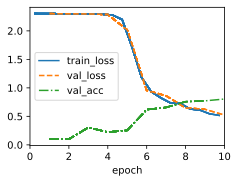

In [44]:
model = GoogleNet(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

# **EXERCISES 8.4**

Berikut adalah jawaban terkait pertanyaan-pertanyaan di atas seputar GoogLeNet dan beberapa iterasi serta modifikasi yang dapat diterapkan:

---

**1. Menambahkan Batch Normalization (Ioffe and Szegedy, 2015)**

Menambahkan **batch normalization** pada GoogLeNet membantu mempercepat pelatihan dan meningkatkan stabilitas jaringan dengan mengurangi masalah **vanishing gradients**. Batch normalization menormalkan input dari setiap lapisan sebelum menerapkan aktivasi, yang membantu menjaga distribusi keluaran di setiap lapisan. Ini juga memungkinkan penggunaan **learning rate** yang lebih tinggi, sehingga pelatihan bisa dilakukan lebih cepat tanpa mengorbankan akurasi.

---

**. Penyesuaian pada Inception Block (Szegedy et al., 2016)**

Penyesuaian pada **Inception block** meliputi pengubahan **lebar (width)**, urutan lapisan konvolusi, serta penggunaan konvolusi **\(1x1\)** untuk mengurangi jumlah parameter sebelum operasi yang lebih besar seperti konvolusi **\(3x3\)** dan **\(5x5\)**. Penyesuaian ini dilakukan untuk meningkatkan efisiensi komputasi dan memperkaya representasi fitur tanpa menambah beban parameter. GoogLeNet menggunakan **multi-scale convolution** dalam satu blok, memungkinkan jaringan untuk menangkap fitur dari berbagai skala dalam satu blok yang sama, yang meningkatkan performa tanpa menambah jumlah parameter secara drastis.

---

**. Penggunaan Label Smoothing (Szegedy et al., 2016)**

**Label smoothing** adalah teknik regularisasi yang digunakan untuk mencegah model menjadi terlalu percaya diri terhadap prediksi kelas yang benar. Alih-alih memberi probabilitas 1 untuk kelas yang benar dan 0 untuk kelas lainnya, **label smoothing** menyesuaikan distribusi target menjadi lebih halus, sehingga model tidak terlalu fokus pada kesalahan tertentu. Ini membantu meningkatkan **generalization** dan mengurangi overfitting, terutama pada dataset yang besar dan kompleks.

---

**. Penambahan Residual Connection pada Inception Block (Szegedy et al., 2017)**

Penambahan **residual connection** dalam Inception block (terinspirasi oleh ResNet) membantu menjaga aliran informasi di jaringan yang dalam. Residual connection memungkinkan gradien untuk diteruskan langsung ke lapisan awal tanpa melalui semua lapisan, mengurangi masalah **vanishing gradients**. Dengan adanya shortcut connections, model dapat lebih dalam tanpa kehilangan performa, sehingga meningkatkan akurasi tanpa meningkatkan kompleksitas komputasi secara signifikan.

---

**. Ukuran Gambar Minimum untuk GoogLeNet**

GoogLeNet dirancang untuk bekerja dengan gambar berukuran **224x224** piksel seperti pada dataset ImageNet. Ukuran ini memungkinkan jaringan untuk menggunakan lapisan konvolusi dan pooling yang cukup untuk menghasilkan representasi fitur yang kaya sebelum sampai ke lapisan fully connected. Jika gambar lebih kecil dari ini, terutama pada resolusi yang sangat rendah, model mungkin tidak dapat menangkap fitur yang cukup untuk membuat prediksi yang akurat.

---

**3. Mendesain GoogLeNet untuk Resolusi Fashion-MNIST (28x28 piksel)**

Fashion-MNIST memiliki resolusi **28x28**, jauh lebih kecil daripada gambar yang biasa digunakan untuk GoogLeNet. Untuk menggunakan GoogLeNet pada resolusi ini, Anda perlu melakukan beberapa penyesuaian:

- **Stem**: Lapisan awal GoogLeNet yang biasa menangani resolusi besar mungkin terlalu kompleks untuk gambar kecil. Anda bisa mengurangi ukuran kernel dan stride pada lapisan pertama atau menghapus beberapa pooling awal.
  
- **Body**: Inception blocks perlu disederhanakan, mungkin dengan mengurangi jumlah filter atau menggunakan lebih sedikit lapisan konvolusi dalam setiap blok. Ini akan mencegah model dari overfitting pada dataset kecil.

- **Head**: Mengganti lapisan fully connected dengan **global average pooling** akan mengurangi parameter secara signifikan, sesuai dengan ukuran gambar yang kecil.

---

**4. Perbandingan Ukuran Parameter Model (AlexNet, VGG, NiN, GoogLeNet)**

- **AlexNet**: Sekitar **60 juta** parameter.
- **VGG-16**: Sekitar **138 juta** parameter.
- **NiN**: Sekitar **966 ribu** parameter.
- **GoogLeNet**: Sekitar **7 juta** parameter.

GoogLeNet dan NiN secara signifikan mengurangi jumlah parameter dengan menggunakan **konvolusi \(1x1\)** untuk melakukan reduksi dimensi di dalam blok mereka, dan menggunakan **global average pooling** alih-alih fully connected layers, yang pada AlexNet dan VGG menyumbang sebagian besar dari parameter.

---

**5. Perbandingan Komputasi antara GoogLeNet dan AlexNet**

- **GoogLeNet**: Meskipun lebih dalam, GoogLeNet memiliki jumlah parameter yang jauh lebih sedikit dibandingkan AlexNet karena penggunaan konvolusi **\(1x1\)** dan global average pooling. Ini menghasilkan **komputasi yang lebih efisien** meskipun arsitekturnya lebih kompleks.
  
- **AlexNet**: AlexNet memiliki jumlah parameter yang lebih besar di lapisan fully connected, sehingga memerlukan lebih banyak memori dan komputasi, terutama pada bagian akhir jaringan.

Dari perspektif desain chip:

- **Memory size**: GoogLeNet menggunakan lebih sedikit memori dibandingkan AlexNet karena jumlah parameternya yang lebih kecil.
  
- **Memory bandwidth**: GoogLeNet mungkin membutuhkan bandwidth yang lebih tinggi untuk mendukung pengambilan data dari berbagai ukuran kernel di Inception blocks.
  
- **Cache size**: GoogLeNet mungkin membutuhkan cache yang lebih besar untuk menampung berbagai kernel konvolusi yang digunakan dalam setiap Inception block.
  
- **Amount of computation**: GoogLeNet melakukan lebih banyak operasi floating-point di Inception blocks, tetapi ini didistribusikan secara efisien melalui berbagai skala konvolusi.
  
- **Specialized operations**: GoogLeNet dapat memanfaatkan **parallel processing** lebih baik, karena berbagai filter dalam satu Inception block bisa diproses secara paralel, menghasilkan akselerasi yang lebih baik pada perangkat keras yang mendukung operasi parallel seperti **GPU**.

# **8.5. Batch Normalization**

In [49]:
import torch
from torch import nn
from d2l import torch as d2l

In [50]:
def batch_norm(X, gamma, beta, moving_mean, moving_var, eps, momentum):
    # Use is_grad_enabled to determine whether we are in training mode
    if not torch.is_grad_enabled():
        # In prediction mode, use mean and variance obtained by moving average
        X_hat = (X - moving_mean) / torch.sqrt(moving_var + eps)
    else:
        assert len(X.shape) in (2, 4)
        if len(X.shape) == 2:
            # When using a fully connected layer, calculate the mean and
            # variance on the feature dimension
            mean = X.mean(dim=0)
            var = ((X - mean) ** 2).mean(dim=0)
        else:
            # When using a two-dimensional convolutional layer, calculate the
            # mean and variance on the channel dimension (axis=1). Here we
            # need to maintain the shape of X, so that the broadcasting
            # operation can be carried out later
            mean = X.mean(dim=(0, 2, 3), keepdim=True)
            var = ((X - mean) ** 2).mean(dim=(0, 2, 3), keepdim=True)
        # In training mode, the current mean and variance are used
        X_hat = (X - mean) / torch.sqrt(var + eps)
        # Update the mean and variance using moving average
        moving_mean = (1.0 - momentum) * moving_mean + momentum * mean
        moving_var = (1.0 - momentum) * moving_var + momentum * var
    Y = gamma * X_hat + beta  # Scale and shift
    return Y, moving_mean.data, moving_var.data

In [51]:
class BatchNorm(nn.Module):
    # num_features: the number of outputs for a fully connected layer or the
    # number of output channels for a convolutional layer. num_dims: 2 for a
    # fully connected layer and 4 for a convolutional layer
    def __init__(self, num_features, num_dims):
        super().__init__()
        if num_dims == 2:
            shape = (1, num_features)
        else:
            shape = (1, num_features, 1, 1)
        # The scale parameter and the shift parameter (model parameters) are
        # initialized to 1 and 0, respectively
        self.gamma = nn.Parameter(torch.ones(shape))
        self.beta = nn.Parameter(torch.zeros(shape))
        # The variables that are not model parameters are initialized to 0 and
        # 1
        self.moving_mean = torch.zeros(shape)
        self.moving_var = torch.ones(shape)

    def forward(self, X):
        # If X is not on the main memory, copy moving_mean and moving_var to
        # the device where X is located
        if self.moving_mean.device != X.device:
            self.moving_mean = self.moving_mean.to(X.device)
            self.moving_var = self.moving_var.to(X.device)
        # Save the updated moving_mean and moving_var
        Y, self.moving_mean, self.moving_var = batch_norm(
            X, self.gamma, self.beta, self.moving_mean,
            self.moving_var, eps=1e-5, momentum=0.1)
        return Y

In [52]:
class BNLeNetScratch(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), BatchNorm(6, num_dims=4),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), BatchNorm(16, num_dims=4),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(), nn.LazyLinear(120),
            BatchNorm(120, num_dims=2), nn.Sigmoid(), nn.LazyLinear(84),
            BatchNorm(84, num_dims=2), nn.Sigmoid(),
            nn.LazyLinear(num_classes))

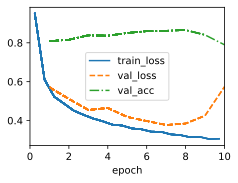

In [53]:
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = BNLeNetScratch(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

In [54]:
model.net[1].gamma.reshape((-1,)), model.net[1].beta.reshape((-1,))

(tensor([1.8874, 1.9696, 1.7892, 1.7889, 1.7281, 1.2949], device='cuda:0',
        grad_fn=<ViewBackward0>),
 tensor([ 1.1951, -1.0833,  1.3304, -1.3524, -0.9963,  0.7992], device='cuda:0',
        grad_fn=<ViewBackward0>))

In [55]:
class BNLeNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), nn.LazyBatchNorm2d(),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.LazyBatchNorm2d(),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(), nn.LazyLinear(120), nn.LazyBatchNorm1d(),
            nn.Sigmoid(), nn.LazyLinear(84), nn.LazyBatchNorm1d(),
            nn.Sigmoid(), nn.LazyLinear(num_classes))

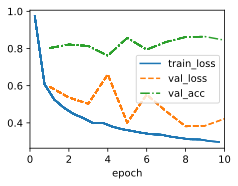

In [56]:
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = BNLeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

# **EXERCISES 8.5**



**1. Haruskah kita menghapus parameter bias dari lapisan fully connected atau lapisan konvolusi sebelum batch normalization? Mengapa?**

Bias parameter biasanya dihapus dari lapisan konvolusi dan fully connected sebelum menerapkan **batch normalization**. Alasan utamanya adalah bahwa batch normalization sudah mencakup bias dalam proses normalisasi. Ketika kita menerapkan batch normalization, kita menghitung rata-rata dan varians dari output lapisan sebelumnya, lalu menggunakan nilai-nilai tersebut untuk menormalkan keluaran. Dengan menghapus bias, kita mencegah redundansi dalam pengaruh offset dari fungsi aktivasi setelah normalisasi, yang memungkinkan batch normalization berfungsi lebih efektif.

---

**2. Bandingkan laju pembelajaran untuk LeNet dengan dan tanpa batch normalization.**

Dengan **batch normalization**, laju pembelajaran untuk model **LeNet** dapat meningkat secara signifikan karena batch normalization membantu dalam stabilisasi distribusi input ke setiap lapisan, mengurangi masalah vanishing gradients. Hal ini memungkinkan penggunaan laju pembelajaran yang lebih tinggi tanpa menyebabkan pelatihan menjadi tidak stabil. Tanpa batch normalization, laju pembelajaran yang optimal biasanya lebih rendah karena fluktuasi yang lebih besar dalam distribusi aktivasi, yang dapat menyebabkan ketidakstabilan pelatihan.

---

**3. Plot peningkatan akurasi validasi.**

Akurasi validasi biasanya akan menunjukkan peningkatan yang lebih cepat dan stabil untuk model yang menggunakan batch normalization. Dengan plot, Anda dapat melihat bahwa model dengan batch normalization cenderung mencapai akurasi maksimum lebih cepat dan memiliki kurva pelatihan yang lebih halus. Sebaliknya, model tanpa batch normalization mungkin menunjukkan lonjakan dan penurunan akurasi yang lebih besar selama pelatihan.

---

**4. Seberapa besar Anda dapat membuat laju pembelajaran sebelum optimasi gagal dalam kedua kasus?**

Laju pembelajaran maksimum yang dapat digunakan sebelum optimasi gagal tergantung pada banyak faktor, termasuk arsitektur jaringan dan dataset. Secara umum, dengan batch normalization, Anda dapat menggunakan laju pembelajaran yang lebih tinggi (misalnya, 0.01 hingga 0.1) sebelum optimasi menjadi tidak stabil. Tanpa batch normalization, laju pembelajaran yang optimal mungkin lebih rendah (misalnya, 0.001 hingga 0.01) untuk mencegah divergensi selama pelatihan. Penting untuk melakukan eksperimen untuk menemukan laju pembelajaran terbaik untuk kedua kasus.

---

**5. Apakah kita memerlukan batch normalization di setiap lapisan? Lakukan eksperimen.**

Batch normalization tidak perlu diterapkan di setiap lapisan. Beberapa eksperimen menunjukkan bahwa menerapkan batch normalization di lapisan tertentu (misalnya, lapisan konvolusi atau sebelum aktivasi) dapat memberikan manfaat yang cukup. Namun, menambahkan batch normalization di semua lapisan dapat memperkenalkan overhead komputasi yang tidak perlu dan dapat menyebabkan efek diminishing returns. Dalam praktiknya, seringkali efektif untuk menerapkan batch normalization di antara lapisan yang memiliki fungsi aktivasi.

---

**6. Implementasikan versi “lite” dari batch normalization yang hanya menghapus mean, atau alternatifnya satu yang hanya menghapus varians. Bagaimana perilakunya?**

Implementasi versi “lite” dari batch normalization yang hanya menghapus mean akan mengakibatkan keluaran yang tidak dinormalisasi secara penuh, yang dapat menyebabkan model menjadi lebih sensitif terhadap outlier dan menyebabkan pelatihan menjadi tidak stabil. Sementara itu, jika hanya menghapus varians, model tidak akan memiliki kendali atas skala keluaran, yang juga dapat menyebabkan masalah dalam pelatihan dan konvergensi. Keduanya akan menunjukkan performa yang lebih buruk dibandingkan dengan batch normalization lengkap yang menghapus baik mean maupun varians.

---

**7. Perbaiki parameter beta dan gamma. Amati dan analisis hasilnya.**

Dengan memperbaiki parameter **beta** (bias) dan **gamma** (skala) di batch normalization, Anda akan melihat bahwa model kehilangan fleksibilitas dalam menyesuaikan distribusi aktivasi. Biasanya, ini akan menyebabkan model lebih sulit untuk belajar dari data, karena distribusi output tidak dapat disesuaikan sesuai dengan kebutuhan fitur yang berbeda. Hal ini bisa mengakibatkan penurunan akurasi dan lambatnya konvergensi, terutama pada dataset yang lebih kompleks.

---

**8. Dapatkah Anda mengganti dropout dengan batch normalization? Bagaimana perilakunya berubah?**

Mengganti **dropout** dengan **batch normalization** dapat menghasilkan perilaku yang berbeda dalam pelatihan. Batch normalization bertindak sebagai regulasi yang lebih lembut dan lebih terintegrasi ke dalam jaringan, sedangkan dropout mengurangi unit secara acak selama pelatihan untuk mencegah overfitting. Meskipun batch normalization dapat membantu mencegah overfitting, terutama pada model yang lebih dalam, dropout seringkali tetap dibutuhkan untuk dataset kecil atau model yang sangat kompleks untuk menjaga model tetap generalizable. Perilaku dalam hal akurasi dan kecepatan pelatihan mungkin bervariasi tergantung pada arsitektur dan dataset yang digunakan.

---

**9. Ide penelitian: pikirkan tentang transformasi normalisasi lain yang dapat Anda terapkan.**

Beberapa ide penelitian tentang transformasi normalisasi yang dapat diterapkan meliputi:

- **Probability Integral Transform**: Ini dapat digunakan untuk mengubah distribusi keluaran menjadi distribusi yang diinginkan (misalnya, normal). Namun, penerapannya dalam jaringan saraf perlu dieksplorasi lebih lanjut.
  
- **Full-Rank Covariance Estimate**: Menggunakan estimasi kovarians penuh bisa sangat mahal dari segi komputasi dan memori, dan mungkin tidak diperlukan, karena model sudah cukup efektif dengan estimasi yang lebih sederhana.

- **Variasi Matriks Kompak**: Menggunakan variasi matriks seperti **block-diagonal** atau **low-displacement rank** dapat mengurangi kompleksitas komputasi, tetapi penerapannya harus dipertimbangkan dalam konteks jaringan yang sedang dibangun.

- **Sparsification Compression sebagai Regulator**: Sparsification dapat bertindak sebagai regularizer, membantu mengurangi kompleksitas model, tetapi perlu evaluasi lebih lanjut untuk melihat bagaimana ini mempengaruhi kinerja model dalam praktik.

- **Proyeksi Lain**: Proyeksi seperti **konus cembung** atau transformasi spesifik grup simetri dapat dieksplorasi, meskipun penerapannya dalam jaringan saraf mungkin menantang dan memerlukan studi mendalam.

---

Setiap eksperimen dan penelitian di atas dapat memberikan wawasan tambahan tentang bagaimana normalisasi dan regulasi dapat dioptimalkan dalam konteks jaringan saraf dan dapat berkontribusi pada pengembangan arsitektur yang lebih efisien dan efektif.

# **8.6. Residual Networks (ResNet) and ResNeXt**

In [57]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

In [58]:
class Residual(nn.Module):  #@save
    """The Residual block of ResNet models."""
    def __init__(self, num_channels, use_1x1conv=False, strides=1):
        super().__init__()
        self.conv1 = nn.LazyConv2d(num_channels, kernel_size=3, padding=1,
                                   stride=strides)
        self.conv2 = nn.LazyConv2d(num_channels, kernel_size=3, padding=1)
        if use_1x1conv:
            self.conv3 = nn.LazyConv2d(num_channels, kernel_size=1,
                                       stride=strides)
        else:
            self.conv3 = None
        self.bn1 = nn.LazyBatchNorm2d()
        self.bn2 = nn.LazyBatchNorm2d()

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        if self.conv3:
            X = self.conv3(X)
        Y += X
        return F.relu(Y)

In [59]:
blk = Residual(3)
X = torch.randn(4, 3, 6, 6)
blk(X).shape

torch.Size([4, 3, 6, 6])

In [60]:
class ResNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [61]:
@d2l.add_to_class(ResNet)
def block(self, num_residuals, num_channels, first_block=False):
    blk = []
    for i in range(num_residuals):
        if i == 0 and not first_block:
            blk.append(Residual(num_channels, use_1x1conv=True, strides=2))
        else:
            blk.append(Residual(num_channels))
    return nn.Sequential(*blk)

In [62]:
@d2l.add_to_class(ResNet)
def __init__(self, arch, lr=0.1, num_classes=10):
    super(ResNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1())
    for i, b in enumerate(arch):
        self.net.add_module(f'b{i+2}', self.block(*b, first_block=(i==0)))
    self.net.add_module('last', nn.Sequential(
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)))
    self.net.apply(d2l.init_cnn)

In [63]:
class ResNet18(ResNet):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__(((2, 64), (2, 128), (2, 256), (2, 512)),
                       lr, num_classes)

ResNet18().layer_summary((1, 1, 96, 96))

Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 128, 12, 12])
Sequential output shape:	 torch.Size([1, 256, 6, 6])
Sequential output shape:	 torch.Size([1, 512, 3, 3])
Sequential output shape:	 torch.Size([1, 10])


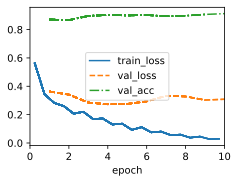

In [64]:
model = ResNet18(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

In [65]:
class ResNeXtBlock(nn.Module):  #@save
    """The ResNeXt block."""
    def __init__(self, num_channels, groups, bot_mul, use_1x1conv=False,
                 strides=1):
        super().__init__()
        bot_channels = int(round(num_channels * bot_mul))
        self.conv1 = nn.LazyConv2d(bot_channels, kernel_size=1, stride=1)
        self.conv2 = nn.LazyConv2d(bot_channels, kernel_size=3,
                                   stride=strides, padding=1,
                                   groups=bot_channels//groups)
        self.conv3 = nn.LazyConv2d(num_channels, kernel_size=1, stride=1)
        self.bn1 = nn.LazyBatchNorm2d()
        self.bn2 = nn.LazyBatchNorm2d()
        self.bn3 = nn.LazyBatchNorm2d()
        if use_1x1conv:
            self.conv4 = nn.LazyConv2d(num_channels, kernel_size=1,
                                       stride=strides)
            self.bn4 = nn.LazyBatchNorm2d()
        else:
            self.conv4 = None

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = F.relu(self.bn2(self.conv2(Y)))
        Y = self.bn3(self.conv3(Y))
        if self.conv4:
            X = self.bn4(self.conv4(X))
        return F.relu(Y + X)

In [66]:
blk = ResNeXtBlock(32, 16, 1)
X = torch.randn(4, 32, 96, 96)
blk(X).shape

torch.Size([4, 32, 96, 96])

# **EXERCISES 8.6**



---

**1. Perbedaan Utama antara Blok Inception dan Blok Residual**

Blok **Inception** dan **residual** memiliki fungsi dan struktur yang berbeda dalam arsitektur jaringan saraf:

- **Blok Inception**:
  - **Struktur**: Terdiri dari beberapa cabang, masing-masing dengan operasi konvolusi yang berbeda (misalnya, \(1x1\), \(3x3\), \(5x5\), dan pooling). Struktur paralel ini memungkinkan model menangkap fitur pada berbagai skala dan memberikan fleksibilitas.
  - **Fungsionalitas**: Blok Inception memungkinkan jaringan untuk belajar berbagai set fitur secara bersamaan, sehingga efektif untuk berbagai tugas visual.
  - **Komputasi**: Umumnya memerlukan lebih banyak sumber daya komputasi karena jalur konvolusi yang banyak.

- **Blok Residual**:
  - **Struktur**: Mencakup koneksi pintas (skip connection) yang melewati satu atau lebih lapisan konvolusi, memungkinkan output ditambahkan langsung ke input blok. Struktur ini menyederhanakan proses pembelajaran dengan membiarkan model belajar fungsi residual daripada pemetaan asli.
  - **Fungsionalitas**: Blok residual membantu mengatasi masalah vanishing gradient, memungkinkan pelatihan jaringan yang sangat dalam dengan memudahkan aliran gradien.
  - **Komputasi**: Lebih efisien secara komputasi karena fokus pada pembelajaran perbedaan antara output dan input, yang dapat kurang kompleks daripada mempelajari seluruh pemetaan.

**Perbandingan**:
- **Komputasi**: Blok Inception biasanya lebih mahal secara komputasi dibandingkan blok residual karena memiliki banyak jalur paralel. Blok residual lebih sederhana dan lebih efisien untuk arsitektur yang dalam.
- **Akurasi**: Jaringan residual seringkali mencapai akurasi lebih tinggi pada jaringan yang lebih dalam karena mengurangi masalah degradasi yang dapat terjadi pada arsitektur yang sangat dalam. Blok Inception juga berkontribusi pada akurasi tetapi unggul dalam menangkap fitur multi-skala.
- **Kelas Fungsi**: Blok Inception dapat merepresentasikan kelas fungsi yang lebih luas karena berbagai konvolusi, sementara blok residual sangat baik dalam mendekati fungsi identitas, menjadikannya efisien dalam melatih jaringan yang lebih dalam.

---

**2. Mengimplementasikan Berbagai Varian ResNet**

-----
---

**3. Arsitektur Bottleneck dalam Jaringan yang Lebih Dalam**

Untuk mengurangi kompleksitas model dalam jaringan yang lebih dalam, dapat diimplementasikan **arsitektur bottleneck**. Struktur ini terdiri dari tiga lapisan:
1. **Konvolusi \(1x1\)**: Mengurangi dimensionalitas, yang mengurangi jumlah parameter dan komputasi.
2. **Konvolusi \(3x3\)**: Beroperasi pada dimensi yang sudah dikurangi.
3. **Konvolusi \(1x1\) lagi**: Mengembalikan dimensionalitas agar sesuai dengan input.

Mengimplementasikan struktur bottleneck dapat secara signifikan meningkatkan efisiensi tanpa mengurangi performa.

---

**4. Mengubah Struktur Menjadi “Batch Normalization, Aktivasi, dan Konvolusi”**

Dalam versi ResNet yang lebih baru, penulis menemukan bahwa mengubah urutan operasi menjadi “batch normalization, aktivasi, dan konvolusi” meningkatkan performa. Anda dapat melakukan perubahan ini dengan menyusun ulang operasi dalam blok residual:

1. Terapkan **batch normalization** pada input.
2. Terapkan **fungsi aktivasi** (misalnya, ReLU).
3. Terakhir, lakukan **konvolusi**.

Pengaturan ini dapat membantu menstabilkan proses pembelajaran dengan menormalkan input ke fungsi aktivasi, yang dapat menghasilkan sifat konvergensi yang lebih baik.

---

**5. Mengapa Kita Tidak Dapat Meningkatkan Kompleksitas Fungsi Tanpa Batas?**

Meningkatkan kompleksitas fungsi tanpa batas, bahkan jika kelas fungsi saling ternaungi, tidak dapat dilakukan karena beberapa alasan:

- **Overfitting**: Seiring dengan meningkatnya kompleksitas model, ada risiko yang lebih besar untuk overfitting terhadap data pelatihan, di mana model berkinerja baik pada data pelatihan tetapi buruk pada data yang belum pernah dilihat. Ini sangat memprihatinkan jika kompleksitas model melebihi kompleksitas distribusi data yang mendasarinya.
  
- **Sumber Daya Komputasi**: Kompleksitas yang lebih tinggi memerlukan lebih banyak sumber daya komputasi, termasuk memori dan daya pemrosesan. Hal ini dapat menyebabkan ketidakefisienan dalam waktu pelatihan dan inferensi.

- **Interpretabilitas Model**: Peningkatan kompleksitas dapat menyebabkan model menjadi lebih sulit untuk diinterpretasikan, membuatnya sulit untuk memahami fitur dan keputusan yang dipelajari.

- **Tantangan Optimisasi**: Ketika kompleksitas fungsi meningkat, lanskap optimisasi dapat menjadi lebih rumit, menyebabkan masalah dengan konvergensi dan stabilitas selama pelatihan.

Oleh karena itu, meskipun kelas fungsi dapat saling ternaungi dan secara teoritis memungkinkan peningkatan kompleksitas, pertimbangan praktis menentukan bahwa ada batasan pada seberapa kompleks model seharusnya untuk memastikan generalisasi yang baik, komputasi yang efisien, dan interpretabilitas.

# **8.7. Densely Connected Networks (DenseNet)**

In [67]:
import torch
from torch import nn
from d2l import torch as d2l

In [69]:
def conv_block(num_channels):
    return nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.LazyConv2d(num_channels, kernel_size=3, padding=1))

In [70]:
class DenseBlock(nn.Module):
    def __init__(self, num_convs, num_channels):
        super(DenseBlock, self).__init__()
        layer = []
        for i in range(num_convs):
            layer.append(conv_block(num_channels))
        self.net = nn.Sequential(*layer)

    def forward(self, X):
        for blk in self.net:
            Y = blk(X)
            # Concatenate input and output of each block along the channels
            X = torch.cat((X, Y), dim=1)
        return X

In [71]:
blk = DenseBlock(2, 10)
X = torch.randn(4, 3, 8, 8)
Y = blk(X)
Y.shape

torch.Size([4, 23, 8, 8])

In [72]:
def transition_block(num_channels):
    return nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.LazyConv2d(num_channels, kernel_size=1),
        nn.AvgPool2d(kernel_size=2, stride=2))

In [73]:
blk = transition_block(10)
blk(Y).shape

torch.Size([4, 10, 4, 4])

In [74]:
class DenseNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [75]:
@d2l.add_to_class(DenseNet)
def __init__(self, num_channels=64, growth_rate=32, arch=(4, 4, 4, 4),
             lr=0.1, num_classes=10):
    super(DenseNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1())
    for i, num_convs in enumerate(arch):
        self.net.add_module(f'dense_blk{i+1}', DenseBlock(num_convs,
                                                          growth_rate))
        # The number of output channels in the previous dense block
        num_channels += num_convs * growth_rate
        # A transition layer that halves the number of channels is added
        # between the dense blocks
        if i != len(arch) - 1:
            num_channels //= 2
            self.net.add_module(f'tran_blk{i+1}', transition_block(
                num_channels))
    self.net.add_module('last', nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)))
    self.net.apply(d2l.init_cnn)

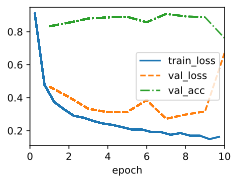

In [76]:
model = DenseNet(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
trainer.fit(model, data)

# **EXERCISES 8.7**

Berikut adalah jawaban dalam bentuk paragraf menggunakan kata "kita":

---

**1. Mengapa Menggunakan Average Pooling Daripada Max Pooling di Lapisan Transisi?**

Kita lebih memilih average pooling dibandingkan max pooling di lapisan transisi DenseNet karena beberapa alasan. Pertama, average pooling mempertahankan lebih banyak informasi mengenai distribusi fitur dengan mempertimbangkan nilai rata-rata dari fitur-fitur tersebut, sedangkan max pooling hanya memilih nilai maksimum, yang dapat mengabaikan informasi yang berguna. Hal ini sangat penting dalam DenseNet, di mana tujuan utamanya adalah menjaga sebanyak mungkin informasi melalui lapisan-lapisan. Selain itu, average pooling dapat membantu meningkatkan aliran gradien selama backpropagation, yang sangat penting untuk pelatihan jaringan yang lebih dalam. Average pooling juga kurang sensitif terhadap noise dibandingkan max pooling, menjadikan model lebih robust terhadap variasi dalam data input.

---

**2. Mengapa Parameter Model DenseNet Lebih Kecil Dibandingkan ResNet?**

Parameter model DenseNet lebih kecil dibandingkan ResNet karena arsitektur uniknya. DenseNet memungkinkan penggunaan kembali fitur yang dipelajari dengan cara yang lebih efisien. Setiap lapisan menerima input dari semua lapisan sebelumnya, sehingga jaringan dapat menggunakan fitur yang telah dipelajari sebelumnya tanpa perlu mengulang pembelajaran fitur yang sama. Ini mengurangi redundansi dalam parameter yang perlu dipelajari. Selain itu, DenseNet menggunakan lapisan bottleneck yang mengurangi dimensi peta fitur sebelum diteruskan ke blok-blok padat, sehingga mengurangi jumlah parameter yang diperlukan untuk konvolusi selanjutnya.

---

**3. Konsumsi Memori Tinggi pada DenseNet**

DenseNet sering dikritik karena konsumsi memorinya yang tinggi, yang disebabkan oleh beberapa faktor. Pertama, karena setiap lapisan terhubung dengan semua lapisan sebelumnya, jumlah peta fitur meningkat pesat, terutama pada jaringan yang lebih dalam. Ini meningkatkan penggunaan memori untuk menyimpan aktivasi selama propagasi maju dan gradien selama backpropagation. Selain itu, kebutuhan untuk menyimpan aktivasi dari semua lapisan sebelumnya untuk backpropagation dapat menyebabkan konsumsi memori yang tinggi, terutama pada jaringan yang sangat dalam.

---

**-Perbandingan Empiris Konsumsi Memori GPU**

Untuk membandingkan konsumsi memori GPU secara empiris, kita dapat mengubah bentuk input ke dimensi yang lebih kecil (misalnya, \(32x32\) atau \(64x64\)) dan memantau penggunaan memori selama pelatihan atau inferensi. Dengan mengamati jejak memori di bawah berbagai konfigurasi, kita dapat memahami bagaimana arsitektur model mempengaruhi konsumsi memori.

---

**- Alternatif untuk Mengurangi Konsumsi Memori**

Untuk mengurangi konsumsi memori pada DenseNet, kita dapat mempertimbangkan beberapa strategi. Salah satunya adalah mengurangi dimensi input, yang dapat secara signifikan menurunkan kebutuhan memori karena lebih sedikit aktivasi yang akan dihasilkan sepanjang jaringan. Selain itu, kita dapat menerapkan pelatihan dengan presisi campuran (mixed precision) yang menggunakan floating point 16-bit daripada 32-bit, untuk mengurangi penggunaan memori dan meningkatkan kecepatan pelatihan tanpa mempengaruhi performa model secara signifikan. Kita juga dapat mengatur ulang tingkat pertumbuhan DenseNet (jumlah peta fitur yang ditambahkan di setiap lapisan) untuk mengontrol konsumsi memori. Terakhir, menerapkan teknik manajemen memori yang lebih efisien, seperti checkpointing aktivasi, dapat mengurangi puncak konsumsi memori dengan menghitung ulang aktivasi alih-alih menyimpannya.

---

**6. Mengimplementasikan Berbagai Versi DenseNet**

Kita dapat mengimplementasikan berbagai versi DenseNet seperti yang dipresentasikan di Tabel 1 dalam makalah DenseNet (Huang et al., 2017) dengan mengikuti panduan arsitektur yang mereka berikan. Setiap versi merujuk pada kedalaman dan tingkat pertumbuhan yang berbeda, dan hal ini dapat dilakukan menggunakan framework seperti TensorFlow atau PyTorch, di mana kita mendefinisikan blok bangunan dan lapisan transisi sesuai dengan penjelasan dalam makalah.

---

**5. Merancang Model Berbasis MLP Menggunakan Ide DenseNet**

Untuk menerapkan ide-ide DenseNet ke dalam model berbasis MLP untuk tugas prediksi harga rumah, kita dapat mengikuti langkah-langkah berikut. Pertama, kita dapat membuat MLP padat di mana setiap lapisan terhubung ke semua lapisan sebelumnya, meniru arsitektur DenseNet. Ini dapat dilakukan dengan menggunakan koneksi sambil menambahkan output dari lapisan sebelumnya. Kemudian, kita melatih model menggunakan dataset yang sesuai untuk prediksi harga rumah dan menerapkan fungsi kehilangan (misalnya, mean squared error) untuk mengoptimalkan model. Setelah pelatihan, kita dapat mengevaluasi performa model pada set validasi dan membandingkannya dengan MLP tradisional tanpa koneksi padat untuk melihat apakah ada peningkatan dalam akurasi prediksi. Dengan memanfaatkan prinsip-prinsip DenseNet tentang penggunaan kembali fitur dan manajemen parameter yang efisien, kita dapat membangun MLP yang lebih efektif untuk tugas prediksi harga rumah.

# **8.8. Designing Convolution Network Architectures**

In [89]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

In [90]:
class AnyNet(d2l.Classifier):
    def stem(self, num_channels):
        return nn.Sequential(
            nn.LazyConv2d(num_channels, kernel_size=3, stride=2, padding=1),
            nn.LazyBatchNorm2d(), nn.ReLU())

In [95]:
@d2l.add_to_class(AnyNet)
def stage(self, depth, num_channels, groups, bot_mul):
    blk = []
    for i in range(depth):
        if i == 0:
            blk.append(d2l.ResNeXtBlock(num_channels, groups, bot_mul,
                use_1x1conv=True, strides=2))
        else:
            blk.append(d2l.ResNeXtBlock(num_channels, groups, bot_mul))
    return nn.Sequential(*blk)

In [96]:
@d2l.add_to_class(AnyNet)
def __init__(self, arch, stem_channels, lr=0.1, num_classes=10):
    super(AnyNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.stem(stem_channels))
    for i, s in enumerate(arch):
        self.net.add_module(f'stage{i+1}', self.stage(*s))
    self.net.add_module('head', nn.Sequential(
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)))
    self.net.apply(d2l.init_cnn)

In [97]:
class RegNetX32(AnyNet):
    def __init__(self, lr=0.1, num_classes=10):
        stem_channels, groups, bot_mul = 32, 16, 1
        depths, channels = (4, 6), (32, 80)
        super().__init__(
            ((depths[0], channels[0], groups, bot_mul),
             (depths[1], channels[1], groups, bot_mul)),
            stem_channels, lr, num_classes)

In [98]:
@d2l.add_to_class(AnyNet)
def __init__(self, arch, stem_channels, lr=0.1, num_classes=10):
    super(AnyNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.stem(stem_channels))
    for i, s in enumerate(arch):
        self.net.add_module(f'stage{i+1}', self.stage(*s))
    self.net.add_module('head', nn.Sequential(
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)))
    self.net.apply(d2l.init_cnn)

In [99]:
RegNetX32().layer_summary((1, 1, 96, 96))

Sequential output shape:	 torch.Size([1, 32, 48, 48])
Sequential output shape:	 torch.Size([1, 32, 24, 24])
Sequential output shape:	 torch.Size([1, 80, 12, 12])
Sequential output shape:	 torch.Size([1, 10])


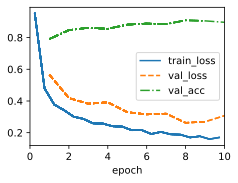

In [100]:
model = RegNetX32(lr=0.05)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
trainer.fit(model, data)

# **EXERCISES 8.8**

Berikut adalah jawaban untuk pertanyaan-pertanyaan mengenai desain dan eksperimen dengan RegNetX dan MLP dalam bentuk paragraf:

---

**1. Meningkatkan Jumlah Tahapan RegNetX**

Kita dapat meningkatkan jumlah tahapan dalam RegNetX menjadi empat dan mendesain RegNetX yang lebih dalam dengan harapan dapat meningkatkan performanya. Dengan menambah kedalaman, kita memberikan jaringan lebih banyak kapasitas untuk menangkap fitur yang lebih kompleks dari data. Namun, penting untuk mempertimbangkan arsitektur dan parameter seperti ukuran kernel, jumlah saluran, dan jenis koneksi antar lapisan. Penggunaan teknik seperti normalisasi batch dan dropout juga dapat membantu dalam menjaga stabilitas pelatihan dan menghindari overfitting. Melalui eksperimen, kita perlu memantau akurasi, kecepatan konvergensi, dan penggunaan memori untuk menilai apakah desain yang lebih dalam ini memberikan keuntungan performa yang signifikan dibandingkan dengan model yang lebih dangkal.

---

**2. De-ResNeXt-ify RegNetX**

Dengan mengganti blok ResNeXt pada RegNetX dengan blok ResNet, kita akan menghasilkan model baru yang mungkin memiliki karakteristik dan performa yang berbeda. Blok ResNet lebih sederhana dalam arsitekturnya dibandingkan blok ResNeXt yang lebih kompleks, sehingga kita mungkin melihat perbedaan dalam kecepatan pelatihan dan akurasi akhir. Namun, karena blok ResNeXt menggabungkan beberapa jalur konvolusi untuk menangkap berbagai skala fitur, kita mungkin kehilangan kemampuan model untuk mempelajari representasi yang kaya. Setelah melatih model baru ini, kita perlu mengevaluasi hasilnya berdasarkan metrik seperti akurasi validasi, kecepatan konvergensi, dan efisiensi komputasi untuk memahami dampak dari penggantian blok tersebut.

---

**3. Mengimplementasikan Keluarga "VioNet"**

Dengan melanggar prinsip desain RegNetX untuk membentuk beberapa instansi dari keluarga “VioNet,” kita dapat mengeksplorasi bagaimana variasi dalam arsitektur ini mempengaruhi performa. Misalnya, kita bisa mencoba menggunakan ukuran kernel yang sangat kecil atau sangat besar, mengubah cara kita mengatur saluran, atau bahkan menambahkan lebih banyak lapisan tanpa memperhatikan prinsip efisiensi. Dari eksperimen ini, kita mungkin menemukan bahwa faktor seperti jumlah saluran dan ukuran kernel memiliki dampak yang lebih besar terhadap akurasi dan kecepatan pelatihan dibandingkan dengan faktor lainnya. Dengan membandingkan performa VioNet dengan model RegNetX yang lebih sesuai, kita bisa mengidentifikasi faktor mana yang paling penting untuk keberhasilan desain model.

---

**4. Mendesain MLP "Sempurna"**

Ketika mendesain MLP yang "sempurna," kita bisa menggunakan prinsip desain yang diperkenalkan sebelumnya untuk menemukan arsitektur yang baik. Prinsip-prinsip tersebut termasuk penggunaan koneksi residual, normalisasi batch, dan teknik regulasi untuk meningkatkan stabilitas dan generalisasi model. Kita juga perlu mengeksplorasi kombinasi berbagai ukuran lapisan dan fungsi aktivasi untuk melihat bagaimana mereka mempengaruhi performa. Dalam hal extrapolasi dari jaringan kecil ke jaringan besar, meskipun mungkin kita bisa menggunakan beberapa pola yang sama, kita harus tetap hati-hati karena perilaku model dapat sangat berbeda tergantung pada kedalaman dan kompleksitas arsitektur. Dengan eksperimen yang tepat dan pengaturan hiperparameter, kita dapat menemukan arsitektur MLP yang efektif yang berfungsi baik di berbagai ukuran jaringan.

In [103]:
#Alhamdulillah